<a href="https://colab.research.google.com/github/hwanseo1218/gdp-dashboard/blob/main/%5B17%EC%A1%B0%5DHello_world_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
#matplotlib 설치
!pip install koreanize-matplotlib

In [196]:
!pip install pygwalker

In [197]:
!pip install altair

In [198]:
#드라이브연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygwalker
import koreanize_matplotlib

In [200]:
##시즌별 선수 스탯 파일 불러오기

bucks_impact_16 = pd.read_csv('/content/drive/MyDrive/17_HelloWorld_PJ/bucks_player_stats/bucks_impact_16.csv')
bucks_impact_17 = pd.read_csv('/content/drive/MyDrive/17_HelloWorld_PJ/bucks_player_stats/bucks_imapct_17.csv')
bucks_impact_18 = pd.read_csv('/content/drive/MyDrive/17_HelloWorld_PJ/bucks_player_stats/bucks_imapct_18.csv')

In [245]:
##시즌별 밀워키팀 평균 스탯 파일 불러오기

bucks_avg_16 = pd.read_csv('/content/drive/MyDrive/17_HelloWorld_PJ/milwaukee team avg stats/bucks_avg_16.csv')
bucks_avg_17 = pd.read_csv('/content/drive/MyDrive/17_HelloWorld_PJ/milwaukee team avg stats/bucks_avg_17.csv')
bucks_avg_18 = pd.read_csv('/content/drive/MyDrive/17_HelloWorld_PJ/milwaukee team avg stats/bucks_avg_18.csv')

bucks_avg_16
bucks_avg_17
bucks_avg_18

,Unnamed: 0,SEASON,밀워키평균경기출전시간,밀워키평균공격리바운드,밀워키평균수비리바운드,밀워키평균어시스트,밀워키평균스틸,밀워키평균불록,밀워키평균득점
0,0,2018,22.426455,1.387,6.035,3.888,1.119,0.885,17.629


In [202]:
##시즌별 영입선수 스탯 파일 불러오기

in15_player_16stats = pd.read_csv('/content/drive/MyDrive/17_HelloWorld_PJ/players_in/15in_player_16stats.csv')
in16_player_17stats = pd.read_csv('/content/drive/MyDrive/17_HelloWorld_PJ/players_in/16in_player_17stats.csv')
in17_player_18stats = pd.read_csv('/content/drive/MyDrive/17_HelloWorld_PJ/players_out/out_players_17stats.csv')

In [203]:
##시즌별 방출선수 스탯 파일 불러오기

out15_player_16stats = pd.read_csv('/content/drive/MyDrive/17_HelloWorld_PJ/players_out/out_players-16stats.csv')
out16_player_17stats = pd.read_csv('/content/drive/MyDrive/17_HelloWorld_PJ/players_out/out_players_17stats.csv')

out15_player_16stats

,Unnamed: 0,PLAYER_NAME,PTS_PER36,OREB_PER36,DREB_PER36,AST_PER36,STL_PER36,BLK_PER36,TO_PER36,PF_PER36,PER36
0,0,Michael Beasley,20.3,1.5,5.9,2.0,1.0,1.0,2.5,3.5,25.8


In [204]:
##순위표(코드 완성되면)

In [205]:
bucks_avg_16.dtypes

,0
Unnamed: 0,int64
SEASON,int64
밀워키평균경기출전시간,float64
밀워키평균공격리바운드,float64
밀워키평균수비리바운드,float64
밀워키평균어시스트,float64
밀워키평균스틸,float64
밀워키평균불록,float64
밀워키평균득점,float64


In [242]:
import altair as alt

bucks_avg_16 = bucks_avg_16.drop(['밀워키평균득점', '밀워키평균경기출전시간'], axis=1, errors='ignore')
bucks_avg_17 = bucks_avg_17.drop(['밀워키평균득점', '밀워키평균경기출전시간'], axis=1, errors='ignore')
bucks_avg_18 = bucks_avg_18.drop(['밀워키평균득점', '밀워키평균경기출전시간'], axis=1, errors='ignore')

join_avg = pd.concat([bucks_avg_16, bucks_avg_17, bucks_avg_18])
join_avg

#밀워키평균경기출전시간 	밀워키평균공격리바운드 	밀워키평균수비리바운드 	밀워키평균어시스트 	밀워키평균스틸 	밀워키평균불록 	밀워키평균득점

source=join_avg
chart_1=alt.Chart(source).mark_line().encode(
    x=alt.X(field = 'SEASON', type='ordinal'),
    y=alt.Y(field='밀워키평균공격리바운드', type = 'quantitative',axis=alt.Axis(labelAngle=45)),
    color = alt.value('green')
).interactive()

chart_2=alt.Chart(source).mark_line().encode(
    x=alt.X(field = 'SEASON', type='ordinal'),
    y=alt.Y(field='밀워키평균수비리바운드', type = 'quantitative',axis=alt.Axis(labelAngle=45)),
    color = alt.value('pink')
).interactive()
chart_3=alt.Chart(source).mark_line().encode(
    x=alt.X(field = 'SEASON', type='ordinal'),
    y=alt.Y(field='밀워키평균어시스트', type = 'quantitative',axis=alt.Axis(labelAngle=45)),
    color = alt.value('red')
).interactive()
chart_4=alt.Chart(source).mark_line().encode(
    x=alt.X(field = 'SEASON', type='ordinal'),
    y=alt.Y(field='밀워키평균스틸', type = 'quantitative',axis=alt.Axis(labelAngle=45)),
    color = alt.value('purple')
).interactive()
chart_5=alt.Chart(source).mark_line().encode(
    x=alt.X(field = 'SEASON', type='ordinal'),
    y=alt.Y(field='밀워키평균불록', type = 'quantitative',axis=alt.Axis(labelAngle=45)),
    color = alt.value('brown')
).interactive()

chart_1|chart_2|chart_3|chart_4|chart_5

layered_chart = chart_1 + chart_2 + chart_3 + chart_4 + chart_5



layered_chart = layered_chart.properties(
    width=300,height=500, title = '밀워키 벅스 시즌별 스탯 변화').encode(
        x=alt.X(field = 'SEASON', type='ordinal',title='SEASON'),
        y=alt.Y(title='STAT')
    )

layered_chart

alt.LayerChart(...)

In [239]:
import altair as alt

bucks_avg_16 = bucks_avg_16.drop(['밀워키평균득점', '밀워키평균경기출전시간'], axis=1, errors='ignore')
bucks_avg_17 = bucks_avg_17.drop(['밀워키평균득점', '밀워키평균경기출전시간'], axis=1, errors='ignore')
bucks_avg_18 = bucks_avg_18.drop(['밀워키평균득점', '밀워키평균경기출전시간'], axis=1, errors='ignore')

join_avg = pd.concat([bucks_avg_16, bucks_avg_17, bucks_avg_18])
join_avg

#밀워키평균경기출전시간 	밀워키평균공격리바운드 	밀워키평균수비리바운드 	밀워키평균어시스트 	밀워키평균스틸 	밀워키평균불록 	밀워키평균득점

source=join_avg
chart_1=alt.Chart(source).mark_line().encode(
    x=alt.X(field = 'SEASON', type='ordinal'),
    y=alt.Y('밀워키평균공격리바운드:N', axis=alt.Axis(labelAngle=45)),
    color = alt.value('green')
).interactive()

chart_2=alt.Chart(source).mark_line().encode(
    x=alt.X(field = 'SEASON', type='ordinal'),
    y=alt.Y('밀워키평균수비리바운드:N', axis=alt.Axis(labelAngle=45)),
    color = alt.value('pink')
).interactive()
chart_3=alt.Chart(source).mark_line().encode(
    x=alt.X(field = 'SEASON', type='ordinal'),
    y=alt.Y('밀워키평균어시스트:N', axis=alt.Axis(labelAngle=45)),
    color = alt.value('red')
).interactive()
chart_4=alt.Chart(source).mark_line().encode(
    x=alt.X(field = 'SEASON', type='ordinal'),
    y=alt.Y('밀워키평균스틸:N', axis=alt.Axis(labelAngle=45)),
    color = alt.value('purple')
).interactive()
chart_5=alt.Chart(source).mark_line().encode(
    x=alt.X(field = 'SEASON', type='ordinal'),
    y=alt.Y('밀워키평균불록:N', axis=alt.Axis(labelAngle=45)),
    color = alt.value('brown')
).interactive()

chart_1|chart_2|chart_3|chart_4|chart_5

layered_chart = chart_1 + chart_2 + chart_3 + chart_4 + chart_5

layered_chart = layered_chart.properties(width=345,height=545)
layered_chart

alt.LayerChart(...)

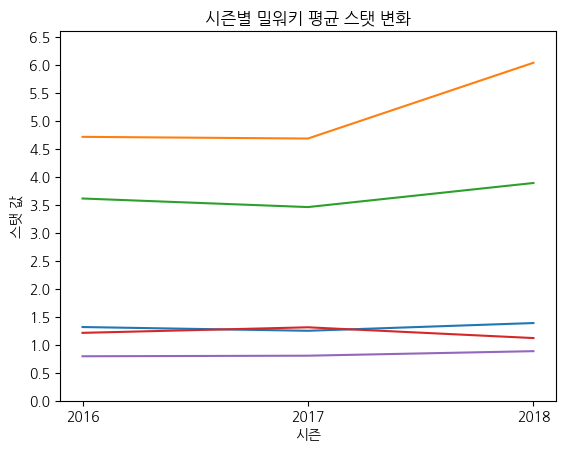

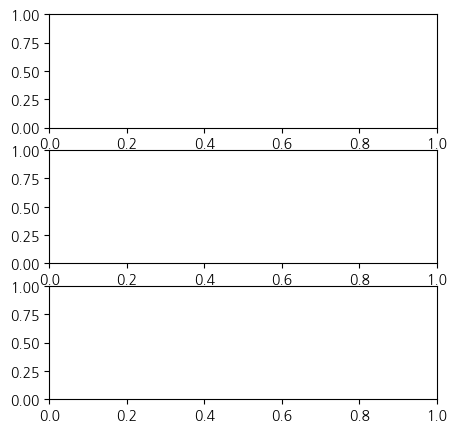

In [207]:
##시즌별 밀워키팀 평균 스탯 변화()

from matplotlib.ticker import MultipleLocator

bucks_avg_16 = bucks_avg_16.drop(['밀워키평균득점', '밀워키평균경기출전시간'], axis=1, errors='ignore')
bucks_avg_17 = bucks_avg_17.drop(['밀워키평균득점', '밀워키평균경기출전시간'], axis=1, errors='ignore')
bucks_avg_18 = bucks_avg_18.drop(['밀워키평균득점', '밀워키평균경기출전시간'], axis=1, errors='ignore')

join_avg = pd.concat([bucks_avg_16, bucks_avg_17, bucks_avg_18])
join_avg



for col in join_avg.columns:
  if col not in ['SEASON','Unnamed: 0']:
    plt.plot(join_avg['SEASON'], join_avg[col], label=col)

['밀워키평균공격리바운드']

plt.title("시즌별 밀워키 평균 스탯 변화")
plt.xlabel("시즌")
plt.ylabel("스탯 값")
plt.xticks([2016,2017,2018])
plt.ylim(bottom =0,top=6.6)
plt.gca().yaxis.set_major_locator(MultipleLocator(0.5))

#plt.legend()
fig, plot = plt.subplots(3,1,figsize=(5,5))

plot1 = plt.subplot(3,1,1)
plot2 = plt.subplot(3,1,2)
plot3 = plt.subplot(3,1,3)
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns



In [208]:
##방출선수 상세 스탯 시각화


from matplotlib.ticker import MultipleLocator

out15_player_16stats

columns = ['PTS_PER36','OREB_PER36','DREB_PER36', 'AST_PER36','STL_PER36', 'BLK_PER36' ,'TO_PER36', 'PF_PER36' ,	'PER36']
melted = out15_player_16stats.melt(id_vars=['PLAYER_NAME'], value_vars=columns)

barplot(x='스탯', y='스탯 값', hue = 'PLAYER_NAME', data=melted)

plt.title("16시즌 이후 방출선수 스탯 확인")
plt.xlabel("스탯")
plt.ylabel("스탯 값")
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_locator(MultipleLocator(1))

plt.legend()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns


NameError: name 'barplot' is not defined

In [ ]:
##영입선수 상세 스탯 시각화

In [ ]:
##시즌별 팀 평균 스탯 시각화

In [ ]:
##방출선수스탯 vs 시즌별 팀 평균 스탯 비교

In [ ]:
##영입선수스탯 vs 시즌별 팀 평균 스탯 비교

In [ ]:
##시즌별 영입 성공 선수 1명 추출(영입된 선수들이 차후에 우승 주축 멤버가 된다는 스토리로 엮을 것)